In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [4]:
y

array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,

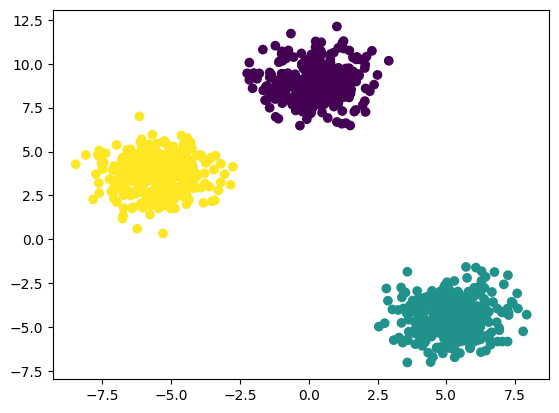

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.cluster import KMeans

In [8]:
## Elbow method to select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)  ## WCSS value

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [9]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1140.4677884655125,
 992.0845125106916,
 856.3745411997465,
 756.9810078533262,
 667.1785115736097,
 580.0841106631565,
 531.3846583938489]

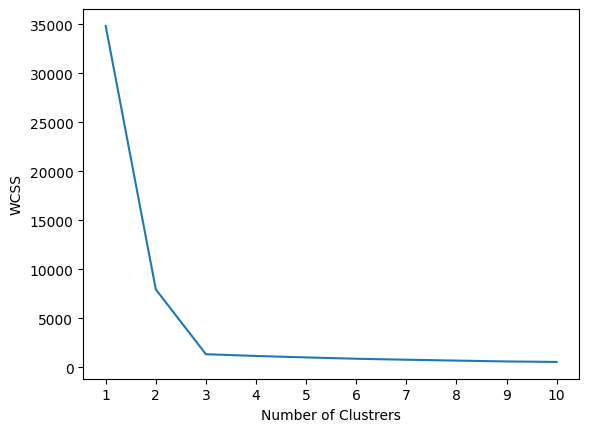

In [10]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [11]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [12]:
y_labels=kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


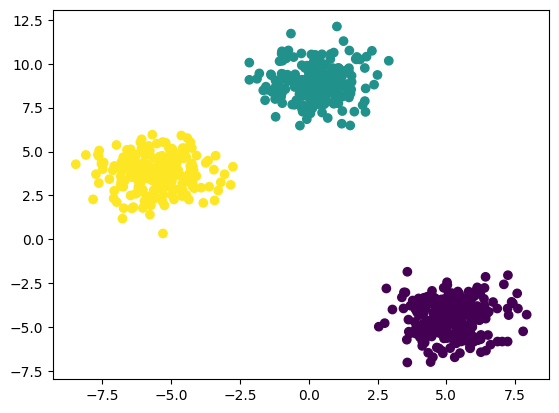

In [13]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [14]:
## knee locator
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from kneed import KneeLocator

In [16]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

In [17]:
## Silhoutte score
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [18]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4814001336222496,
 0.33546405990172856,
 0.3291959915605165,
 0.33629944249394067,
 0.34501369478892435,
 0.3396473279115721]

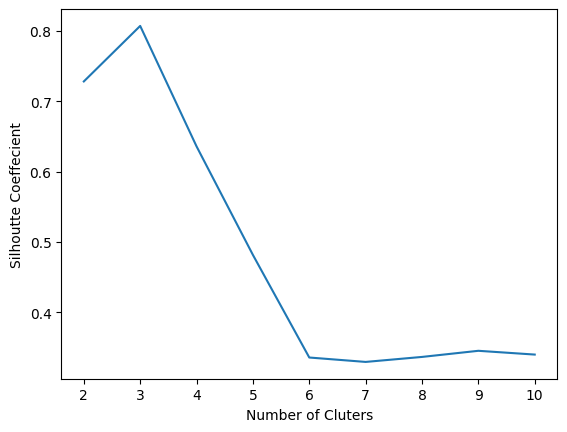

In [19]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()